# IPL Data analysis of season 2008-17

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_csv('deliveries.csv')

In [3]:
matches = pd.read_csv('matches.csv')

In [4]:
deliveries.shape

(150460, 21)

In [5]:
matches.shape

(636, 18)

In [6]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
29382,127,1,Royal Challengers Bangalore,Kings XI Punjab,16,2,JH Kallis,LRPL Taylor,IK Pathan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
44803,190,2,Chennai Super Kings,Kings XI Punjab,18,4,MS Gony,JA Morkel,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
26342,113,2,Rajasthan Royals,Mumbai Indians,9,4,SR Watson,M Kaif,AM Nayar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
79274,336,2,Kings XI Punjab,Mumbai Indians,10,6,SE Marsh,DJ Hussey,Harbhajan Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
133800,564,2,Kings XI Punjab,Sunrisers Hyderabad,14,3,Gurkeerat Singh,DA Miller,KV Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [7]:
matches.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
408,409,2013,Chandigarh,2013-04-21,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,DA Miller,"Punjab Cricket Association Stadium, Mohali",M Erasmus,K Srinath,NaN
449,450,2013,Dharamsala,2013-05-18,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,50,0,Azhar Mahmood,Himachal Pradesh Cricket Association Stadium,HDPK Dharmasena,CK Nandan,NaN
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN


In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [10]:
# Finding which columns has missing or NaN values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

## Data Preprocessing

In [11]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [12]:
# Dropping umpire3 column as all values are NaN

matches.drop(columns=['umpire3'], inplace=True)

In [13]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [14]:
# filling NaN values in deliveries by 0abs

deliveries.fillna(0, inplace=True)

In [15]:
deliveries['dismissed'] = deliveries['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)

## Total matches played at particular venue

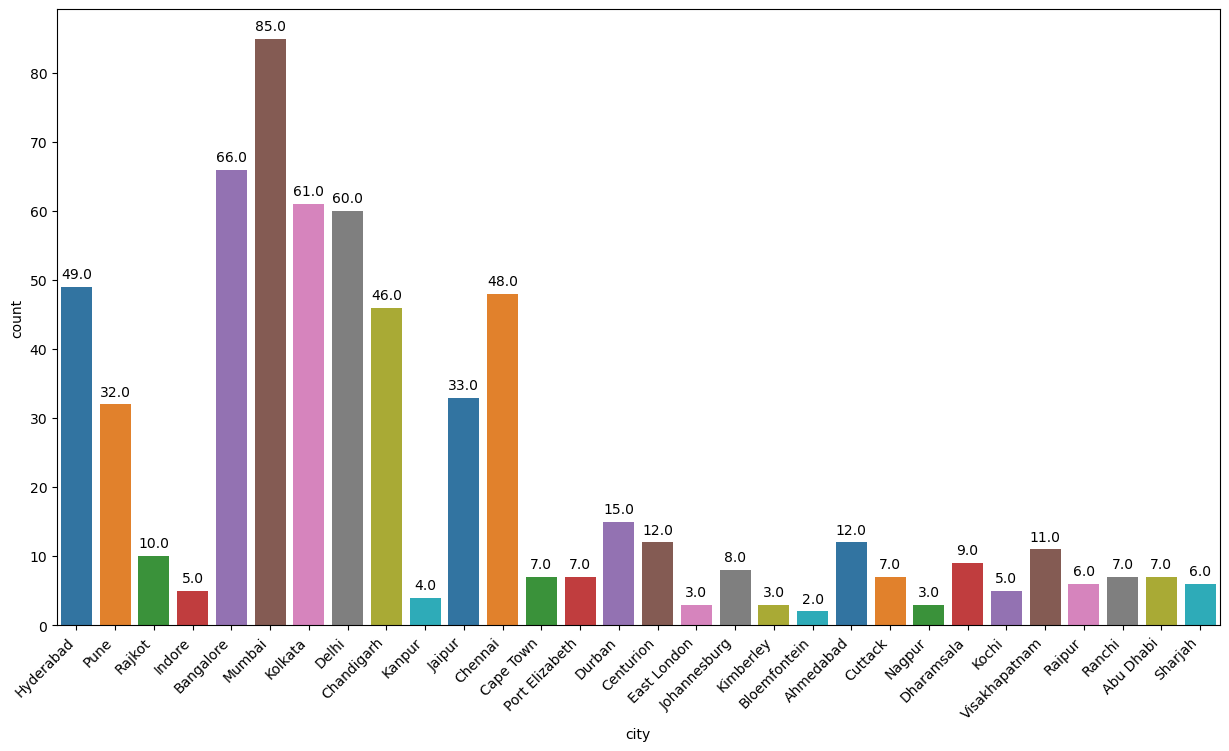

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))


ax=sns.countplot(x=matches['city'],palette='tab10')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

## Total matches played by particular team

In [17]:
matches_played=matches['team1'].value_counts() + matches['team2'].value_counts()

In [18]:
matches_played

CSK     131
DC       75
DD      147
GL       30
KKR     148
KTK      14
KXIP    148
MI      157
PW       46
RCB     152
RPS      30
RR      118
SRH      76
Name: count, dtype: int64

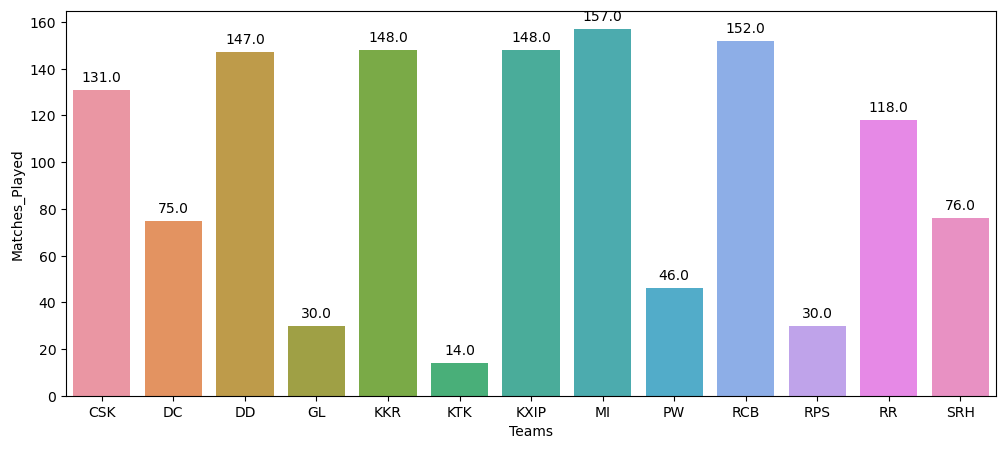

In [19]:
# Reset the index to use it as a column
matches_played_reset = matches_played.reset_index()

# Rename columns for clarity
matches_played_reset.columns = ['Teams', 'Matches_Played']

# Create the barplot
fig, ax = plt.subplots(figsize=(12, 5))

ax=sns.barplot(x='Teams', y='Matches_Played', data=matches_played_reset)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Show the plot
plt.show()

## Toss winner percentage

In [20]:
toss_winner=matches['toss_winner'].value_counts()

In [21]:
slices = toss_winner.values.tolist()
labels = toss_winner.index.tolist()

([<matplotlib.patches.Wedge at 0x2338383cf10>,
 [Text(1.0044575054530285, 0.4484028542940818, 'MI'),
  Text(0.37281618792198506, 1.0348952072665711, 'KKR'),
  Text(-0.4234604940522712, 1.0152247091048399, 'DD'),
  Text(-0.9786228083019366, 0.5022921451418799, 'RCB'),
  Text(-1.0764121408290048, -0.2265764839428821, 'KXIP'),
  Text(-0.7098374326739447, -0.8403159043924273, 'CSK'),
  Text(-0.07058789978325418, -1.0977328219581437, 'RR'),
  Text(0.4877354888743084, -0.9859584640807845, 'DC'),
  Text(0.8225297899815126, -0.7303730174321673, 'SRH'),
  Text(0.9883556418648971, -0.48285932236400636, 'PW'),
  Text(1.0566861309814737, -0.30563772769637604, 'GL'),
  Text(1.088733178268039, -0.15703523979787024, 'RPS'),
  Text(1.0991412403481053, -0.043457263673968224, 'KTK')],
 [Text(0.7761717087591583, 0.3464931146817904, '13.4%'),
  Text(0.2880852361215339, 0.7996917510696231, '12.3%'),
  Text(-0.32721947267675494, 0.7844918206719216, '11.3%'),
  Text(-0.75620853368786, 0.38813483942781624, '1

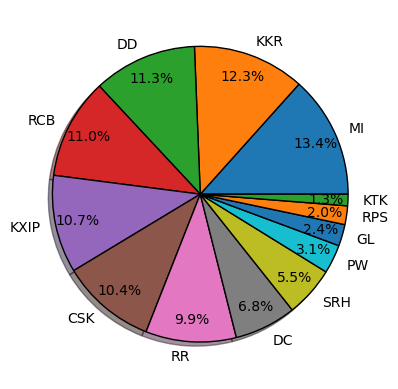

In [22]:
plt.pie(slices,labels=labels,shadow=True, autopct='%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor':'black'})

## Toss decisions percentage

In [23]:
print("Toss decisions in percentage(%):\n" ,(matches['toss_decision'].value_counts()/matches['toss_decision'].shape[0]*100))

Toss decisions in percentage(%):
 toss_decision
field    57.075472
bat      42.924528
Name: count, dtype: float64


### Toss decisions throughout seasons

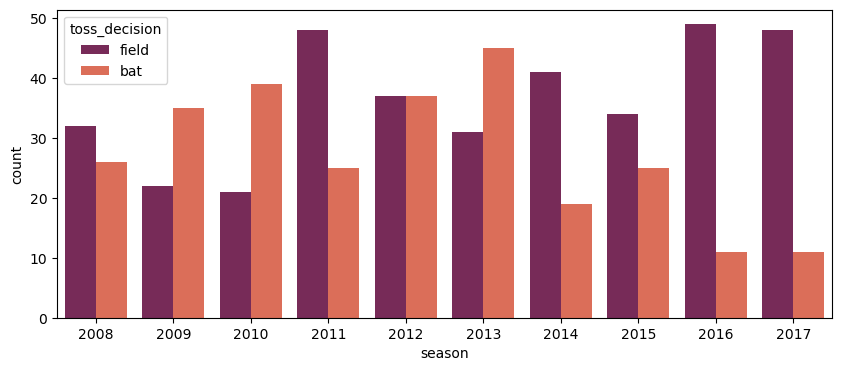

In [24]:
plt.subplots(figsize=(10,4))
sns.countplot(x=matches['season'],hue=matches['toss_decision'],palette='rocket',data=matches)

plt.show()

In [25]:
# match won by most runs throughout IPL seasons 

df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','city','team1','team2','winner','win_by_runs','player_of_match']]

,season,city,team1,team2,winner,win_by_runs,player_of_match
43,2017,Delhi,MI,DD,MI,146,LMP Simmons


__-->Mumabi indians defeated Delhi Daredevils with most run difference in 2017__

## Number of wins by particular teams

<Axes: xlabel='winner', ylabel='count'>

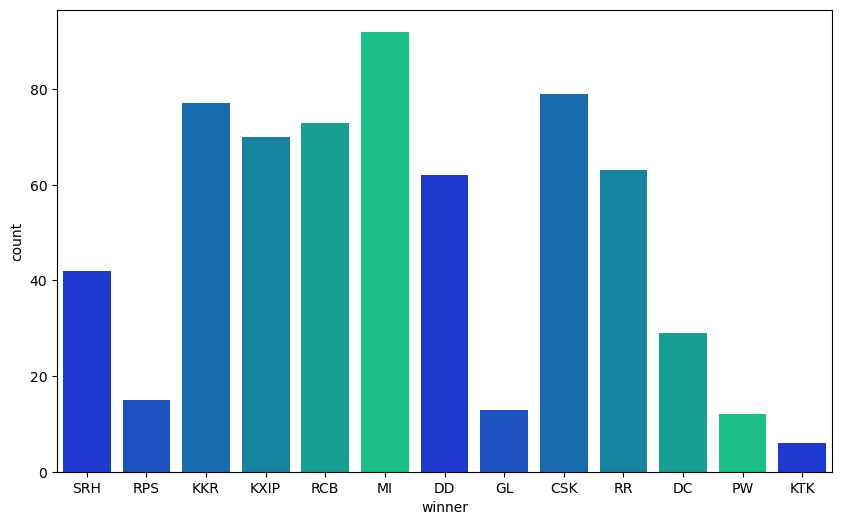

In [26]:
plt.subplots(figsize=(10,6))
sns.countplot(x='winner',data=matches,palette=sns.color_palette('winter')) 

## Total matches vs Wins Comparison

In [27]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()

In [28]:
matches_played_byteams[['winner','wins']]=matches['winner'].value_counts().reset_index()

In [29]:
def g(matches_played_byteams):
    return (matches_played_byteams.groupby('winner')
            .agg(count=('count', 'sum'), wins=('wins', 'max'))
            .reset_index())

# Call the function and print the result
result = g(matches_played_byteams.copy())
print(result)

   winner  count  wins
0     CSK    152    79
1      DC     75    29
2      DD    118    62
3      GL     30    13
4     KKR    148    77
5     KTK     14     6
6    KXIP    147    70
7      MI    157    92
8      PW     30    12
9     RCB    148    73
10    RPS     46    15
11     RR    131    63
12    SRH     76    42


In [30]:
result.rename(columns={'winner':'teams','count':'total_matches'},inplace=True)

In [31]:
winner = result['teams'].tolist()
counts = result['total_matches'].tolist()
wins = result['wins'].tolist()

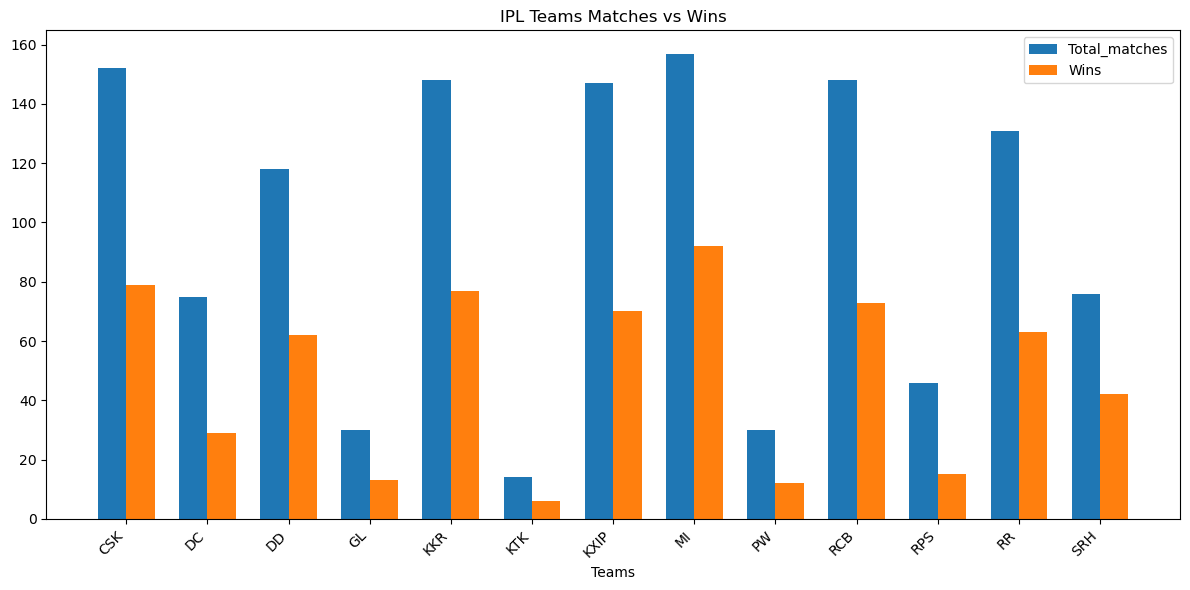

In [32]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
index = range(len(winner))  # x-axis positions for bars

# Create multiple bars at each position with width 0.35
bar_width = 0.35
bars1 = ax.bar(index, counts, bar_width, label='Total_matches')
bars2 = ax.bar([p + bar_width for p in index], wins, bar_width, label='Wins')

# Set labels and title
ax.set_xlabel('Teams')
ax.set_title('IPL Teams Matches vs Wins')

# Set x-axis tick positions and labels
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(winner, rotation=45, ha='right')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

In [33]:
# Top 10 players with most man of the match awards

matches['player_of_match'].value_counts(ascending=False).head(10)

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: count, dtype: int64

In [34]:
print(matches['player_of_match'].value_counts().idxmax(), '--->  Most man of the match awards')
print(matches['winner'].value_counts().idxmax(), '--->  Most matches won')

CH Gayle --->  Most man of the match awards
MI --->  Most matches won


## Is Toss winner is match winner

In [35]:
matches[matches['toss_winner']==matches['winner']].shape[0]/matches.shape[0]*100

51.100628930817614

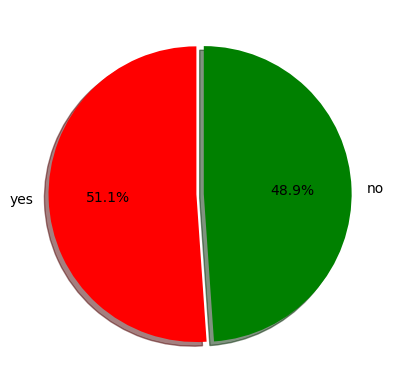

In [36]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(matches.shape[0]-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()

plt.show()

In [37]:
matches['result'].value_counts()

result
normal       626
tie            7
no result      3
Name: count, dtype: int64

## Total matches played throughout seasons

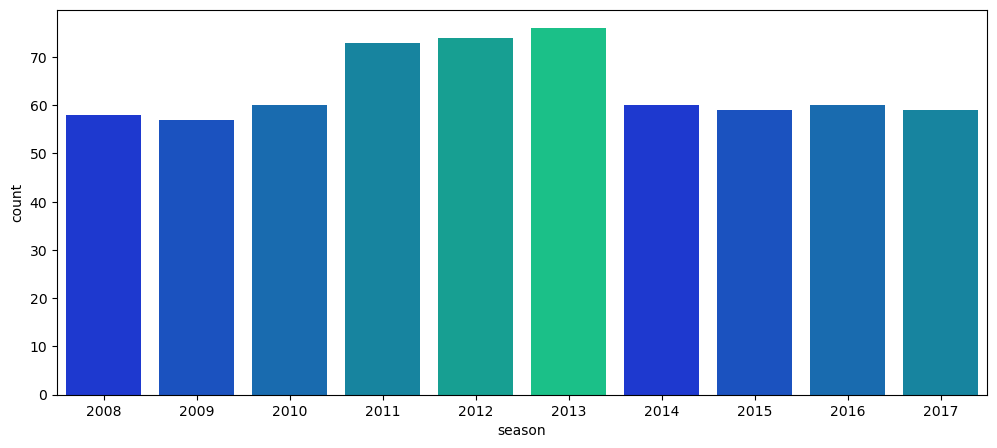

In [38]:
plt.subplots(figsize=(12,5))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
plt.show()

## Total matches played at particular stadium

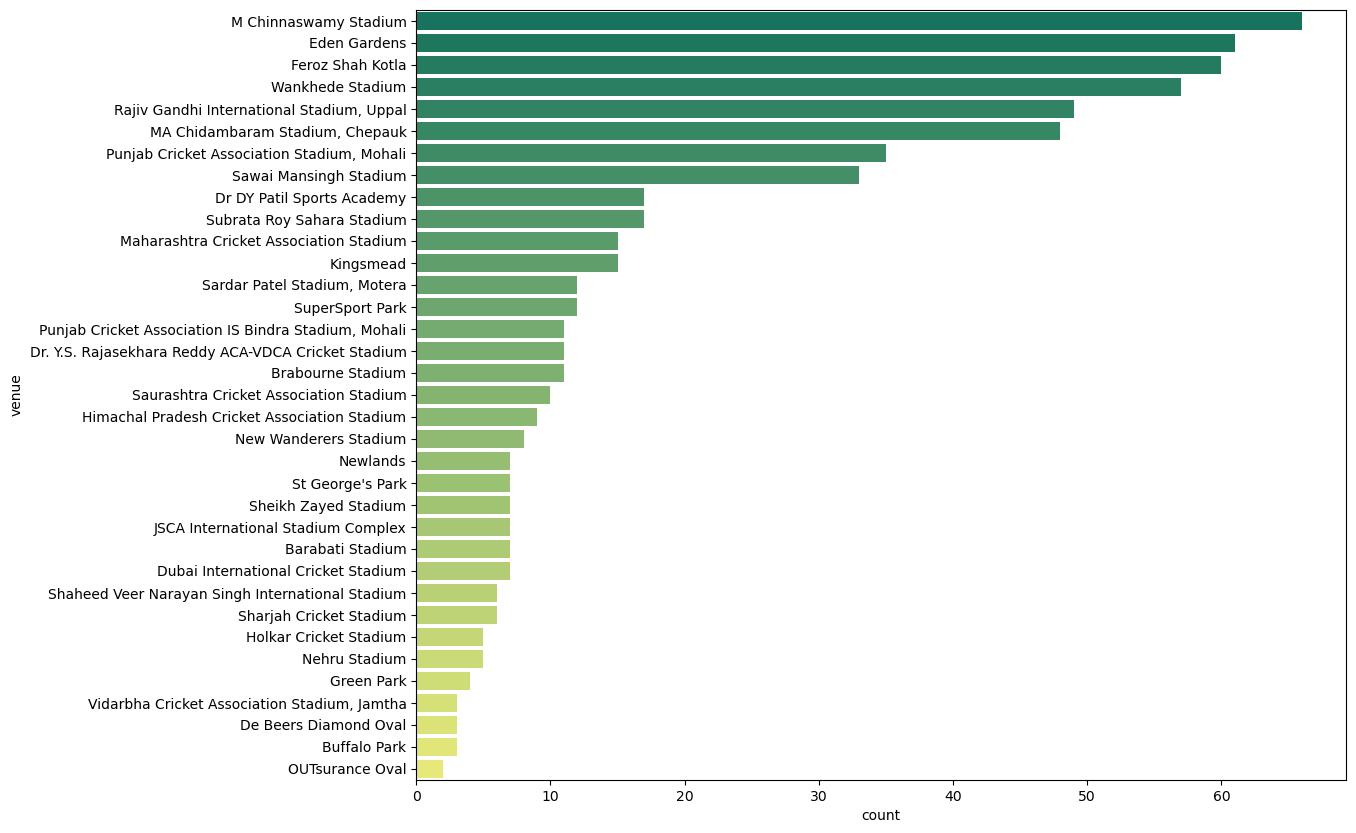

In [39]:
venue_count=matches['venue'].value_counts(ascending=False).reset_index()

plt.subplots(figsize=(12,10))
sns.barplot(x='count', y='venue',data=venue_count, palette='summer', orient='h')
plt.show()

In [40]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,dismissed
38297,164,1,KXIP,DC,4,6,SM Katich,Yuvraj Singh,RP Singh,0,...,0,0,0,1,0,1,0,0,0,0
126862,534,2,RCB,MI,19,2,Iqbal Abdulla,D Wiese,SL Malinga,0,...,0,0,0,1,0,1,0,0,0,0
91078,385,1,RR,DD,20,5,R Shukla,S Sreesanth,A Nehra,0,...,0,0,0,0,0,0,0,0,0,0
130453,551,1,SRH,CSK,4,4,DA Warner,S Dhawan,A Nehra,0,...,0,0,0,4,0,4,0,0,0,0
107528,454,1,CSK,MI,16,1,SK Raina,MEK Hussey,MM Patel,0,...,0,0,0,4,0,4,0,0,0,0


## Most runs scored by player in IPL

In [41]:
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

In [42]:
batsman_runs.reset_index().head(10)

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


## Most sixes by player in IPL

In [43]:
most_six=deliveries[deliveries['batsman_runs']==6]

most_six=most_six.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10).reset_index()
most_six

,batsman,batsman_runs
0,CH Gayle,266
1,SK Raina,174
2,RG Sharma,173
3,V Kohli,160
4,DA Warner,160
5,AB de Villiers,158
6,MS Dhoni,156
7,YK Pathan,149
8,KA Pollard,148
9,Yuvraj Singh,141


## Most fours by player in IPL

In [44]:
most_fours=deliveries[deliveries['batsman_runs']==4]

most_fours=most_fours.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10).reset_index()
most_fours

,batsman,batsman_runs
0,G Gambhir,484
1,SK Raina,402
2,DA Warner,401
3,S Dhawan,401
4,V Kohli,384
5,RV Uthappa,377
6,RG Sharma,354
7,V Sehwag,334
8,AM Rahane,320
9,CH Gayle,297


## Most wickets by player in IPL

In [45]:
most_wickets=deliveries[deliveries['dismissed']==1]

most_wickets=most_wickets.groupby('bowler')['dismissed'].count().sort_values(ascending=False).head(10).reset_index()
most_wickets

,bowler,dismissed
0,SL Malinga,170
1,A Mishra,142
2,DJ Bravo,137
3,Harbhajan Singh,136
4,PP Chawla,133
5,R Vinay Kumar,125
6,A Nehra,121
7,Z Khan,119
8,B Kumar,117
9,R Ashwin,110


## Death over analysis

### Sixes in death overs by teams in IPL

In [46]:
death_overs=deliveries[deliveries['over']>=14]

six = death_overs[death_overs['batsman_runs']==6]

In [47]:
pt_six = six.pivot_table(index='over', columns='batting_team', values='batsman_runs', aggfunc='count', fill_value=0)
pt_six

batting_team,CSK,DC,DD,GL,KKR,KTK,KXIP,MI,PW,RCB,RPS,RR,SRH
over,,,,,,,,,,,,,
14,45,22,35,8,31,3,41,50,13,53,5,38,18
15,43,20,28,5,40,4,51,53,13,54,12,34,33
16,46,21,43,5,50,0,59,66,16,71,11,37,22
17,51,38,56,7,55,3,39,60,13,61,8,45,18
18,58,37,44,9,52,4,57,86,12,82,11,34,37
19,54,23,59,9,45,5,53,72,18,74,16,37,42
20,68,19,50,4,34,2,60,89,19,71,20,26,28


### Fours in death overs by teams in IPL

In [48]:
fours = death_overs[death_overs['batsman_runs']==4]

pt_fours = fours.pivot_table(index='over', columns='batting_team', values='batsman_runs', aggfunc='count')
pt_fours

batting_team,CSK,DC,DD,GL,KKR,KTK,KXIP,MI,PW,RCB,RPS,RR,SRH
over,,,,,,,,,,,,,
14,75,35,78,23,83,4,92,90,15,91,12,75,42
15,78,48,68,16,97,8,97,111,22,90,9,83,48
16,68,43,78,20,86,5,87,102,18,86,12,66,44
17,96,48,94,25,92,5,99,119,18,99,18,84,43
18,83,41,110,20,93,5,84,97,27,105,13,76,43
19,92,46,77,22,79,6,94,114,19,104,15,55,52
20,80,39,78,15,83,5,86,97,23,83,18,69,44


### Wickets in death overs by teams in IPL

In [49]:
wickets = death_overs[death_overs['batsman_runs']==4]

pt_wickets = wickets.pivot_table(index='over', columns='batting_team', values='dismissed', aggfunc='count')
pt_wickets

batting_team,CSK,DC,DD,GL,KKR,KTK,KXIP,MI,PW,RCB,RPS,RR,SRH
over,,,,,,,,,,,,,
14,75,35,78,23,83,4,92,90,15,91,12,75,42
15,78,48,68,16,97,8,97,111,22,90,9,83,48
16,68,43,78,20,86,5,87,102,18,86,12,66,44
17,96,48,94,25,92,5,99,119,18,99,18,84,43
18,83,41,110,20,93,5,84,97,27,105,13,76,43
19,92,46,77,22,79,6,94,114,19,104,15,55,52
20,80,39,78,15,83,5,86,97,23,83,18,69,44


## Individual batsman runs against particular team in IPL

In [50]:
def batsman_run_against_team(name):
    player_name = deliveries[deliveries['batsman']==name]
    return player_name.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False)

In [51]:
batsman_run_against_team('RG Sharma')

bowling_team
KKR     710
DD      670
CSK     535
KXIP    528
RCB     519
RR      403
RPS     178
DC      175
SRH     169
PW      135
MI      103
GL       82
Name: batsman_runs, dtype: int64

## Batsman vs Bowler analysis

In [52]:
def batsman_run_against_bowler(batsman, bowler):
    bat_v_bowl=deliveries[(deliveries['batsman']==batsman) & (deliveries['bowler']==bowler)]
    batsman_runs=bat_v_bowl['batsman_runs'].sum()
    bowler_wicket=bat_v_bowl['dismissed'].sum()
    
    
    return print(batsman,'V/S', bowler,'\n runs scored by batsman: ',batsman_runs,'\n no of dismissed by bowler: ',bowler_wicket)

In [53]:
batsman_run_against_bowler('SK Raina','Harbhajan Singh')

SK Raina V/S Harbhajan Singh 
 runs scored by batsman:  132 
 no of dismissed by bowler:  5


In [54]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,dismissed
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,0,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,0,0,0,0


In [55]:
deliveries['is_super_over'].unique()

array([0, 1], dtype=int64)

## Number of super over played in IPL

In [56]:
no_super_over=deliveries[(deliveries['is_super_over']==1) & (deliveries['ball']==1)].shape[0]
print('No of super over played in IPL: ', no_super_over)

No of super over played in IPL:  14
